# 토픽 모델링
- 구조화되지 않은 대량의 텍스트로부터 숨겨져 있는 주제 구조를 발견하기 위한 통계적 추론 알고리즘
- 맥락과 관련된 단서들을 기반으로 의미를 가진 단어들을 클러스터링 하여 주제를 추론하는 모델
- 비지도학습으로 문서를 하나 이상의 토픽으로 할당 : LDA(Latent Dirichlet Allocation)

- 감성 분석을 통해 텍스트의 감성 정도를 지표로 나타낼 수 있다. : 단어 사전 기반 분석, 지도 학습 기반 분석

# 1. 감정 분석

## 감성 분석(Sentiment Analysis)
- 텍스트에 나타난 주관성 요소를 탐지하여 긍정과 부정의 요소 및 그 정도를 판별하여 정량화 하는 작업
- 긍정과 부정의 대상이 되는 단어 또는 개체를 추출하고 감성을 표현하는 이의 의도나 입장을 분석하는 것
- 감성 표현을 분석함으로써 이에 나타난 의견, 평가, 태도 등의 특징정 양상을 정량화된 데이터로 제시 하는것

## 감성 분석
- 궁극적인 목적 : 단순히 절대적 지표로 표현하는 것이 아니라 텍스트 간 비교 우위를 밝혀서 상대적 비교를 하는것
- 감성 분석
    - 단어 사전 기반 분석
    - 지도 학습 기반 분석

- 단어 사전 기반 분석
    - 어떤 단어가 어떤 감성을 전달하는 단어인지를 알려줄 수 있는 보조 정보가 필수적
    - 감성 사전을 이용하여 각 단어의 감정 분류와 그 정도를 알 수 있어야 함

- 지도학습 기반 분석
    - 특정 단어 혹은 특정 표현이 사용된 문서가 어떤 감성을 나타내는 지를 예측할 수 있음
    - 텍스트와 해당 텍스트의 문서별 감성 지수가 사전에 정의되어 있어야 함
    - 텍스트의 주제나 장르 또는 맥락이 균일하고 분류 모델에 적용할 새로운 데이터도 같은 성격의 텍스트이어야 함
        - 텍스트마다 해당 성격에 따라 서로 다른 특성을 보일 수 있음

- 단어 사전 기반 감성 분석
    - 텍스트에 쓰인 잔어의 감성 수준을 계산하고, 이를 통해 감성 정도를 계산
    - 긍정 : good, happy, pleasuer, beautiful, etc.
    - 부정 : bad, terrible, gloomy, sad, etc.
- 사전 기반 감성 분석을 하기 위해서는 어떤 감성 사전을 사용할 것인지가 매우 중요하며 감성 사전에 따라 결과도 조금 다르게 나올 수 있음

- AFINN
    - Finn Aurp Nielsen이 2009 ~ 2011년에 직접 수집한 감성 어휘들에 대해 +- 5의 점수를 부여한 사전
    - 2,477개의 감성 어휘들이 영어 사용자의 판단을 통해 부정적, 긍정적 감성 점수 부여

# 단어 사전 기반 감성 분석

- EmoLex
    - 단어들을 긍정과 부정으로 나눌 뿐만 아니라 분노, 공포, 기대, 신뢰, 놀람, 슬픔 기쁨 역겨움 등 8가지 감정으로도 나눌 수 있음 > 인간의 정서 정보를 더욱 풍부하게 반영
    - 크라우드 소싱을 통해서 감성 정보를 축적하였음 > 다수의 사람이 감성 정보 코딩에 참여하였음
    - 1만 4,182개의 감성 어휘들을 보유

# 단어 사전 기반 감성 분석

- Bing Liu lexicon
    - 감성 어휘들을 긍정, 부정으로만 분류하고 있으며, 따로 점수를 표기하지 않음
    - 6,8000여 개의 감성 어휘들이 존재하며 지속적으로 업데이트를 하고 있음

# 단어 사전 기반 감성 분석
- 긍정, 부정, 중립으로 단어들을 분류
- 파이썬 NLTK 패키지에서 사용할 수 있어 간편함
- 지속적으로 버전업을 하고 있으며, 현재 3.0버전까지 발표됨

# 단어 사전 기반 감성 분석
- 한국어 감성 사전을 일반인에게 공개된 사전을 찾기가 쉽지 않음
감성 사전이 개발자에게 사전 동의를 구한 후 사용할 수 있거나 기업의 지적 재산권으로 보호되고 있음

In [3]:
# 영화 리뷰(IMDB) 감성을 분석해보자!
# 관련 라이브러리 불러오기

import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 영화 리뷰(IMDB) 감성을 분석해보자!
# IMDB 데이터 셋에서 긍정 학습 집합 20번째 데이터 불러온 다음, readlines 함수로 해당 데이터의 문자열을 받음

pos_review = glob.glob("C:\\Users\student\Desktop\텍스트 마이닝\data\데이터\\aclImdb\\train\pos\*.txt")[20]

with open(pos_review, "r") as f:
    lines1 = f.readline()

In [7]:
# Afinn()을 이용하여 감성 점수 산출
afinn = Afinn()
afinn.score(lines1)

8.0

In [10]:
# 부정 데이터 셋을 같은 방식으로 감성 점수 산출
neg_review = glob.glob("C:\\Users\student\Desktop\텍스트 마이닝\data\데이터\\aclImdb\\train\pos\*.txt")[20]

with open(neg_review, "r") as f:
    lines2 = f.readline()[0]

In [22]:
# 부정 데이터 셋을 같은 방식으로 감성 점수 산출 및 감성 사전 불러오기
afinn.score(lines2)
NRC = pd.read_csv("C:\\Users\student\Desktop\텍스트 마이닝\data\데이터\\nrc.txt",
                  engine="python",
                  header=None,
                  sep="\t")
NRC = NRC[(NRC != 0).all(1)]
NRC = NRC.reset_index(drop=True)  # 감성어와 감성 표현이 유의미한 라벨들만 추출

            0             1  2
0       aback         anger  0
1       aback  anticipation  0
2       aback       disgust  0
3       aback          fear  0
4       aback           joy  0
...       ...           ... ..
141815   zoom      negative  0
141816   zoom      positive  0
141817   zoom       sadness  0
141818   zoom      surprise  0
141819   zoom         trust  0

[141820 rows x 3 columns]


In [24]:
# 영화 리뷰(IMDB) 감성을 분석해보자!
tokenizer = RegexpTokenizer("[Ww]+")
stop_words = stopwords.words("english")
p_stemmer = PorterStemmer()

RegexpTokenizer(pattern='[Ww]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [28]:
# 긍정 텍스트 전처리
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]
match_words = [x for x in stopped_tokens if x in list(NRC[0])]

['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


In [20]:
# 감성 사전과 텍스트의 감성어들을 맵핑하기
emotion = []
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0], 1])
    for j in temp:
        emotion.append(j)

In [21]:
# 감성 표현들의 출현 횟수를 합친 후 결과 제시하기
sentiment_result1 = pd.Series(emotion).value_counts()
sentiment_result1

C:\Users\student\AppData\Local\Temp\ipykernel_9084\2497877776.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiment_result1 = pd.Series(emotion).value_counts()


Series([], dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

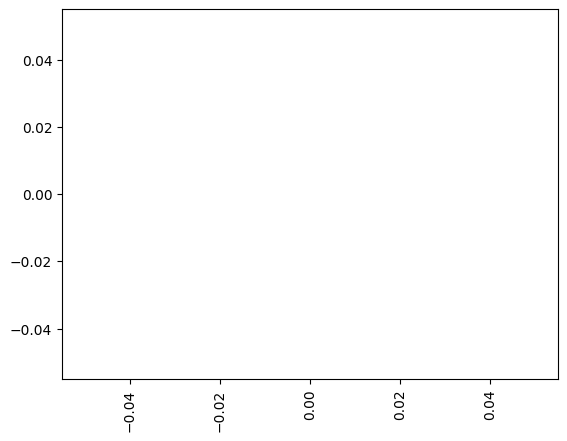

In [17]:
# 감성 표현들의 출현 횟수를 합친 후 결과 제시하기
sentiment_result1.plot.bar()

In [14]:
# 감성 표현들의 출현 횟수를 합친 후 결과 제시하기
raw = lines2.lower()
tokens.tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in  stop_words]

match_words = [x for x in stopped_tokens if x in list(NRC[0])]

NameError: name 'lines2' is not defined

In [15]:
# 감성 표현들의 출현 횟수를 합친 후 결과 제시하기
emotion = []
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0])[0], 1])
    for j in temp:
        emotion.append(j)

NameError: name 'match_words' is not defined

In [16]:
sentiment_result2 = pd.Series(emotion).value_counts()
sentiment_result2

C:\Users\student\AppData\Local\Temp\ipykernel_2856\3635913031.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiment_result2 = pd.Series(emotion).value_counts()


Series([], dtype: int64)

In [17]:
sentiment_result2.plot_bar()

AttributeError: 'Series' object has no attribute 'plot_bar'

# 지도학습 기반 감성 분석
- 텍스트 마이닝에서의 지도학습
    - 인간 코더(Coder)가 판단한 긍정 및 부정 라벨이 포함된 텍스트 데이터 중 일부 문서가 학습데이터로 사용됨
    - 기계학습 기반 분류 모델을 구성한 후 해당 모델을 이용하여 새로운 평가 데이터가 입력될 때 긍정 및 부정 여부를 판별

    - 사전 기반 감성 분석에 비해 세밀하고 특수한 경우의 텍스트에 관한 감성 분석을 할 때 유용할 수 있음

# 지도 학습 기반 감성 분석

- 감성 분석에서 지도 학습을 적용하려면 훈련 및 평가 데이터의 성격이 동일해야 함
    - 텍스트의 주제, 성겨에 따라 유사한 어구라도 긍정 및 부정 여부가 달라질 수 있음
    - 지도 학습 모델을 구성하기 위해서는 라벨을 포함한 대량의 훈련 데이터가 필요함

In [18]:
# 관련 랄이브러리 불러오기
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 긍정 리뷰 학습 집합 불러오기
pos_review = glob.glob("")
lines_pos = []
for i in pos_review:
    try:
        with open(i, "r") as f:
            temp = f.read()
